In [321]:
import numpy as np
#if this fails, you need to put the case_studies.py file in the same folder
from case_studies import *

In [322]:
from scipy.optimize import minimize

#These are the example optimizers you should evaluate this week.
#These ar eoptimizers implemented in scipy.
#they take as first 2 or 3 arguments the function f, its gradient df and sometimes its hessian Hf.
#the next parameters are all the same: x0 is the starting point, max_iterations the stopping criterion for iterations
#and epsilon the precision tolerance to be reached. 
#Note: epsilon is interpreted slightly differently across algorithms, and some algorithms might not reach the tolerance
#and stop early.
def scipy_bfgs(f,df,x0,max_iterations,epsilon):
    xs=[]
    grad_norms=[]
    def logging_f(x):
        xs.append(x)
        grad_norms.append(np.maximum(np.linalg.norm(df(x)),10**(-5)*epsilon))
        return f(x)
    minimize(logging_f, x0, method="BFGS", jac=df, tol=epsilon,options={'maxiter':max_iterations, 'gtol':epsilon})
    return np.array(xs), np.array(grad_norms)

def scipy_newton(f,df,Hf,x0,max_iterations,epsilon):
    xs=[]
    grad_norms=[]
    def logging_f(x):
        xs.append(x)
        grad_norms.append(np.maximum(np.linalg.norm(df(x)),10**(-5)*epsilon))
        return f(x)
    minimize(logging_f, x0, method="Newton-CG", jac=df, hess=Hf, tol=epsilon,options={'maxiter':max_iterations,'xtol':epsilon})
    return np.array(xs), np.array(grad_norms)

def scipy_trust_region(f,df,Hf,x0,max_iterations,epsilon):
    xs=[]
    grad_norms=[]
    def logging_f(x):
        xs.append(x)
        grad_norms.append(np.maximum(np.linalg.norm(df(x)),10**(-5)*epsilon))
        return f(x)
    minimize(logging_f, x0, method="trust-exact", jac=df, hess=Hf, tol=epsilon,options={'maxiter':max_iterations})
    return np.array(xs), np.array(grad_norms)

In [323]:
#example usage of the algorithms
#the output is a list of points evaluated on the function as well as the gradient norms at that point
#this algorithms has the first three arguments functions for function value, gradient and Hessian.
#For the 5 functions, those are named f1-f5 etc and cna be found in the case_studies.py file
x0=np.ones(2)
xs,grad_norms = scipy_trust_region(f4,df4,Hf4,x0, 1000, 1.e-10)


#the optimal point for a given function and dimensionality is stored in the package as well for at least 15 decimals precision
optimal = x_opt("f4", 2)
print("final solution point:", xs[-1])
print("distance of x from optimum", np.linalg.norm(xs[-1]-optimal))
print("number of function evaluations:", len(grad_norms))
print("final function value:", f4(xs[-1]))
print("final gradient norm:", grad_norms[-1])


final solution point: [0.00190933 0.00190933]
distance of x from optimum 1.1857524696459338e-11
number of function evaluations: 9
final function value: 1.2203194789920598e-05
final gradient norm: 9.977761920841575e-11


# Evaluate optimizer

In [ ]:
import pandas as pd
#Evaluation function
def evaluate_optimizer(f, df, optimizer, x0, max_iterations, eps, Hf=None):
    if Hf is not None:
        xs, grad_norms = optimizer(f, df, Hf, x0, max_iterations, eps)
    else:
        xs, grad_norms = optimizer(f, df, x0, max_iterations, eps)
    optimizer_name = optimizer.__name__
    fname = f.__name__

    optimal_solution = x_opt(fname, len(x0))
    final_solution_point = xs[-1]
    dist_to_optimum = np.linalg.norm(xs[-1]-optimal_solution)
    num_of_fun_evals = len(grad_norms)
    final_fun_value = f(xs[-1])
    final_grad_norm = grad_norms[-1]

    return {
        "optimizer": optimizer_name,
        "function": fname,
        "distance_to_optimum": dist_to_optimum,
        "num_evaluations": num_of_fun_evals,
        "final_function_value": final_fun_value,
        "final_gradient_norm": final_grad_norm,
        "grad_norms": grad_norms
    }

# Averages - pandas

In [350]:
max_iterations = 1000
eps = 1.e-10

f_list = [f1, f2, f3, f4, f5]
df_list = [df1, df2, df3, df4, df5]
hf_list = [Hf1, Hf2, Hf3, Hf4, Hf5]

# x0s = [np.array([-10000, -10000]), np.array([-10000, 10000]), np.array([10000, -10000]), np.array([10000, 10000]),
                # np.array([-5000, -5000]), np.array([-5000, 5000]), np.array([5000, -5000]), np.array([5000, 5000]),
                # np.array([-50, -50]), np.array([-50, 50]), np.array([50, -50]), np.array([50, 50])]

x0s = [np.array([-5, -5]), np.array([-5, 5]), np.array([5, -5]), np.array([5, 5]),
                np.array([-2, -2]), np.array([-2, 2]), np.array([2, -2]), np.array([2, 2]),
                np.array([-1, -1]), np.array([-1, 1]), np.array([1, -1]), np.array([1, 1])] 



bfgs_results = []
newton_results = []
trust_region_results = []

for f, df, hf in zip(f_list, df_list, hf_list):
    for x0 in x0s:
        result_bfgs = evaluate_optimizer(f, df, scipy_bfgs, x0, max_iterations, eps)
        result_newton = evaluate_optimizer(f, df, scipy_newton, x0, max_iterations, eps, hf)
        result_trust_region = evaluate_optimizer(f, df, scipy_trust_region, x0, max_iterations, eps, hf)
        bfgs_results.append(result_bfgs)
        newton_results.append(result_newton)
        trust_region_results.append(result_trust_region)




df_bfgs = pd.DataFrame(bfgs_results)
df_newton = pd.DataFrame(newton_results)
df_trust_region = pd.DataFrame(trust_region_results)

# numeric_columns = ["distance_to_optimum", "num_evaluations", "final_function_value", "final_gradient_norm"]

# bfgs_avg = df_bfgs[numeric_columns].mean()
# newton_avg = df_newton[numeric_columns].mean()
# trust_region_avg = df_trust_region[numeric_columns].mean()

grad_norms_bfgs = df_bfgs["grad_norms"]

Runs Each Optimizer for All 12 Starting Points (x0s):

Calls test_optimizer() separately for each x0 and collects results.
Computes the Average Per Step:

Since some optimizations may terminate early, we pad shorter sequences with their last value to ensure consistency.
Computes the mean of all x0s at each iteration.
Plots the Averages with a Log Scale on the y-axis:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of functions and their gradients and Hessians
functions = [f1, f2, f3, f4, f5]
dfs = [df1, df2, df3, df4, df5]
Hfs = [Hf1, Hf2, Hf3, Hf4, Hf5]

# Define multiple starting points
x0s = [np.array([-5, -5]), np.array([-5, 5]), np.array([5, -5]), np.array([5, 5]),
       np.array([-2, -2]), np.array([-2, 2]), np.array([2, -2]), np.array([2, 2]),
       np.array([-1, -1]), np.array([-1, 1]), np.array([1, -1]), np.array([1, 1])]

# Maximum iterations allowed for each optimization
MAX_ITER_STOP = 50


# Function to compute the gradient norm at each point
def compute_gradient_norm(xs, df):
    return [np.linalg.norm(df(x)) for x in xs]

# Function to run the optimizer and return results
def test_optimizer(optimizer, f, df, x0, max_iterations, epsilon, Hf=None):
    if Hf is not None:
        xs, grad_norms = optimizer(f, df, Hf, x0, max_iterations, epsilon)
    else:
        xs, grad_norms = optimizer(f, df, x0, max_iterations, epsilon)

    xs = xs[:MAX_ITER_STOP]
    grad_norms = grad_norms[:MAX_ITER_STOP]

    gradients = compute_gradient_norm(xs, df)

    return gradients, len(xs)

# Function to compute the average across all starting points
def average_across_starts(optimizer, f, df, Hf, max_iterations, epsilon):
    all_grad_norms = []
    
    for x0 in x0s:
        if optimizer == scipy_bfgs:
            grad_norms, _ = test_optimizer(optimizer, f, df, x0, max_iterations, epsilon)
        else:
            grad_norms, _ = test_optimizer(optimizer, f, df, x0, max_iterations, epsilon, Hf)
        
        all_grad_norms.append(grad_norms)

    # Pad shorter sequences with last value
    max_len = max(len(d) for d in all_grad_norms)
    all_grad_norms = [g + [g[-1]] * (max_len - len(g)) for g in all_grad_norms]

    avg_grad_norms = np.mean(all_grad_norms, axis=0)

    return  avg_grad_norms, max_len


# Function to plot the average gradient norm
def plot_gradient_norm():
    optimizers = [scipy_bfgs, scipy_newton, scipy_trust_region]
    optimizer_names = ['BFGS', 'Newton', 'Trust Region']
    max_iterations = 1000
    epsilon = 1e-10
    
    plt.figure(figsize=(12, 8))
    
    for optimizer, name in zip(optimizers, optimizer_names):
        for f, df, Hf in zip(functions, dfs, Hfs):
            avg_grad_norms, n_iterations = average_across_starts(optimizer, f, df, Hf, max_iterations, epsilon)
            plt.plot(range(n_iterations), avg_grad_norms, label=f"{name} - {f.__name__}")

    plt.xlabel('Iterations')
    plt.ylabel('Average Gradient Norm')
    plt.title('Optimizer Performance Comparison (Gradient Norm)')
    plt.yscale("log")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

 


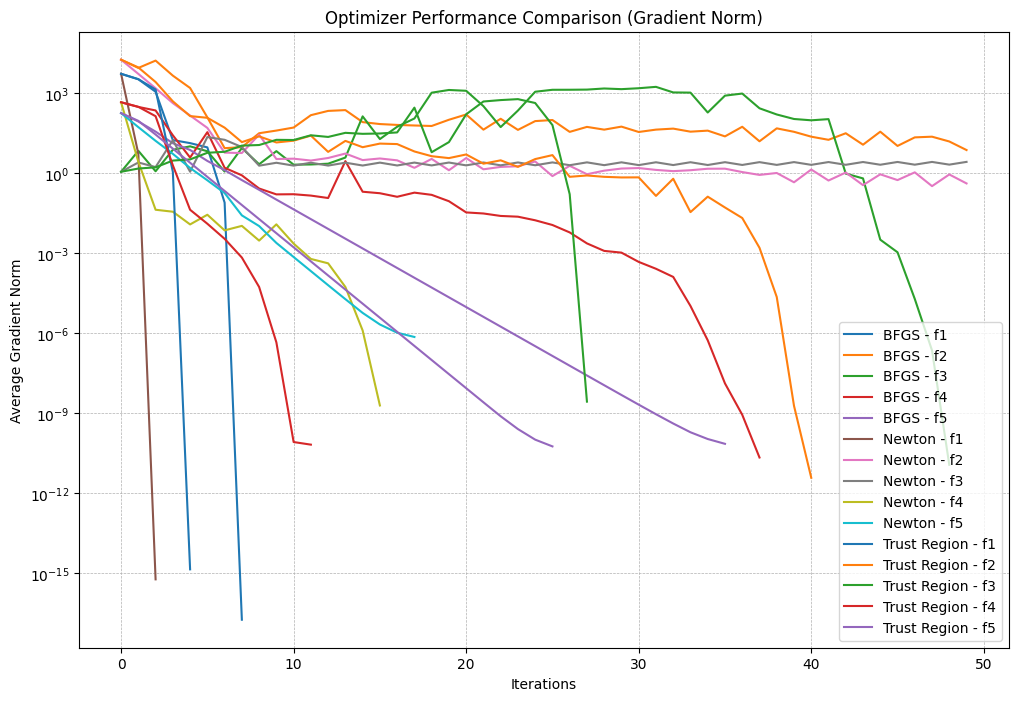

In [351]:
plot_gradient_norm()
